# Sample Terason Analysis

In [1]:
import os

from pathlib import Path
Path.cwd()

PosixPath('/home/das/QuantUS_Projs/QuantUS/CLI-Demos')

In [2]:
os.chdir(Path().cwd().parent)
Path.cwd()

PosixPath('/home/das/QuantUS_Projs/QuantUS')

## Select Image & Phantom and Parse

In [3]:
from src.Parsers.terasonRfParser import getImage

In [4]:
# Inputs
imagePath = Path("/media/das/CREST Data/David_S_Data/Terason_Lymphedema_Data/62051-017/62051-017-03 Ld.mat")
phantomPath = Path("/media/das/CREST Data/David_S_Data/Terason_Lymphedema_Data/image 4 phantom .mat.mat")

In [5]:
imgDataStruct, imgInfoStruct, refDataStruct, refInfoStuct = getImage(
    f"{imagePath}", f"{phantomPath}"
)

## ROI Selection (from GUI)

In [6]:
import pickle

pkl_name = Path("/media/das/CREST Data/David_S_Data/Terason_Lymphedema_Data/a_sample_roi.pkl")

with open(pkl_name, "rb") as f:
    roi_info = pickle.load(f)

In [7]:
assert roi_info["Image Name"] == imagePath.name
assert roi_info["Phantom Name"] == phantomPath.name

In [8]:
splineX = roi_info["Spline X"]
splineY = roi_info["Spline Y"]

## Analysis Config (from GUI)

In [9]:
from pyQus.analysisObjects import Config

pkl_name = Path("/media/das/CREST Data/David_S_Data/Terason_Lymphedema_Data/config.pkl")

with open(pkl_name, "rb") as f:
    config_info = pickle.load(f)

In [10]:
assert config_info["Image Name"] == imagePath.name
assert config_info["Phantom Name"] == phantomPath.name

In [11]:
config = config_info["Config"]

## Spectral Analysis

In [12]:
from pyQus.spectral import SpectralAnalysis
from pyQus.analysisObjects import UltrasoundImage

In [13]:
ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfoStruct.axialRes
ultrasoundImage.lateralResRf = imgInfoStruct.lateralRes
ultrasoundImage.bmode = imgDataStruct.bMode
ultrasoundImage.phantomRf = refDataStruct.rf
ultrasoundImage.rf = imgDataStruct.rf

In [14]:
spectralAnalysis = SpectralAnalysis()
spectralAnalysis.ultrasoundImage = ultrasoundImage
spectralAnalysis.config = config
spectralAnalysis.splineX = splineX
spectralAnalysis.splineY = splineY

In [15]:
spectralAnalysis.generateRoiWindows()
spectralAnalysis.computeSpecWindows()

# Visualizations

In [16]:
import matplotlib.pyplot as plt

from src.DataLayer.spectral import SpectralData

In [17]:
spectralData = SpectralData()
spectralData.spectralAnalysis = spectralAnalysis
spectralData.scConfig = None # not scan converted

In [18]:
spectralData.convertImagesToRGB()

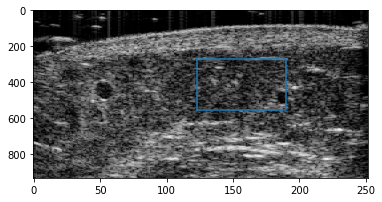

In [19]:
quotient = imgInfoStruct.depth / imgInfoStruct.width
plt.imshow(spectralData.finalBmode, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

In [20]:
spectralData.drawCmaps()

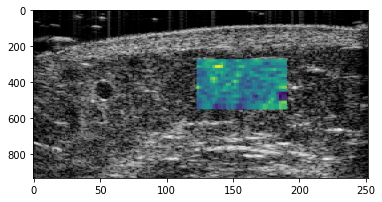

In [21]:
plt.imshow(spectralData.mbfIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

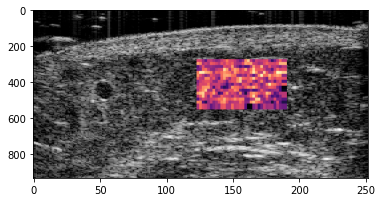

In [22]:
plt.imshow(spectralData.ssIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

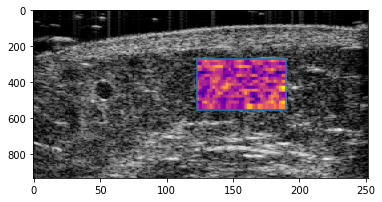

In [23]:
plt.imshow(spectralData.siIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

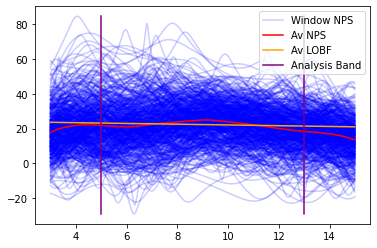

In [24]:
spectralData.plotPsData()